### Assignment Requirement

<font size="5">

Download and analyze [this](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) dataset about **New York Airbnb listings**. Note that there are some missing values.

For this assignment, you should work in a notebook, create plots, and write some markdown comments as you go through the data. First, load the file and understand what each column represents. Then, try to extract some sort of knowledge from the data.

For example, you may look at the top 10 most expensive listings on the ladder, or the top 10 most reviewed. See if there is a high correlation between different columns and draw some conclusions. You may take a closer look at a particular listing, make an analysis per room type, or make a comparison between neighbourhood groups.

Be creative.

</font>

## Reading the dataset

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Read the csv dataset
df = pd.read_csv("AB_NYC_2019.csv")
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

## Show on the NYC map the available listings

In [26]:
import cv2

# Load the image
nyc_img = cv2.imread('/content/New_York_City_.png')

# Determine the image heigh and width
img_height, img_width, _ = nyc_img.shape
img_height, img_width

(1291, 1326)

In [18]:
# Get the min and mag latitude and longitude from the dataframe
min_lat = df['latitude'].min()
max_lat = df['latitude'].max()
min_long = df['longitude'].min()
max_long = df['longitude'].max()
min_lat, max_lat, min_long, max_long

(40.49979, 40.91306, -74.24442, -73.71299)

In [19]:
# Calculate the scaling factors for latitude and longitude
lat_scale = img_height / (max_lat - min_lat)
long_scale = img_width / (max_long - min_long)
lat_scale, long_scale

(3123.865753623507, 2495.1545829177867)

- Convert latitude and longitude to pixel coordinates by mapping the range of lat/long to the range of image pixels


In [20]:
# Function to convert lat/long to pixel coordinates
def map_coordinates_to_pixels(latitude, longitude, min_lat, max_lat, min_long, max_long, img_height, img_width):
    # Normalize latitude and longitude to a 0-1 range
    norm_lat = (latitude - min_lat) / (max_lat - min_lat)
    norm_long = (longitude - min_long) / (max_long - min_long)

    # Map to image pixel coordinates
    # Image y-axis is from top to bottom, so we invert the latitude
    pixel_y = int((1 - norm_lat) * img_height)
    pixel_x = int(norm_long * img_width)

    return pixel_x, pixel_y

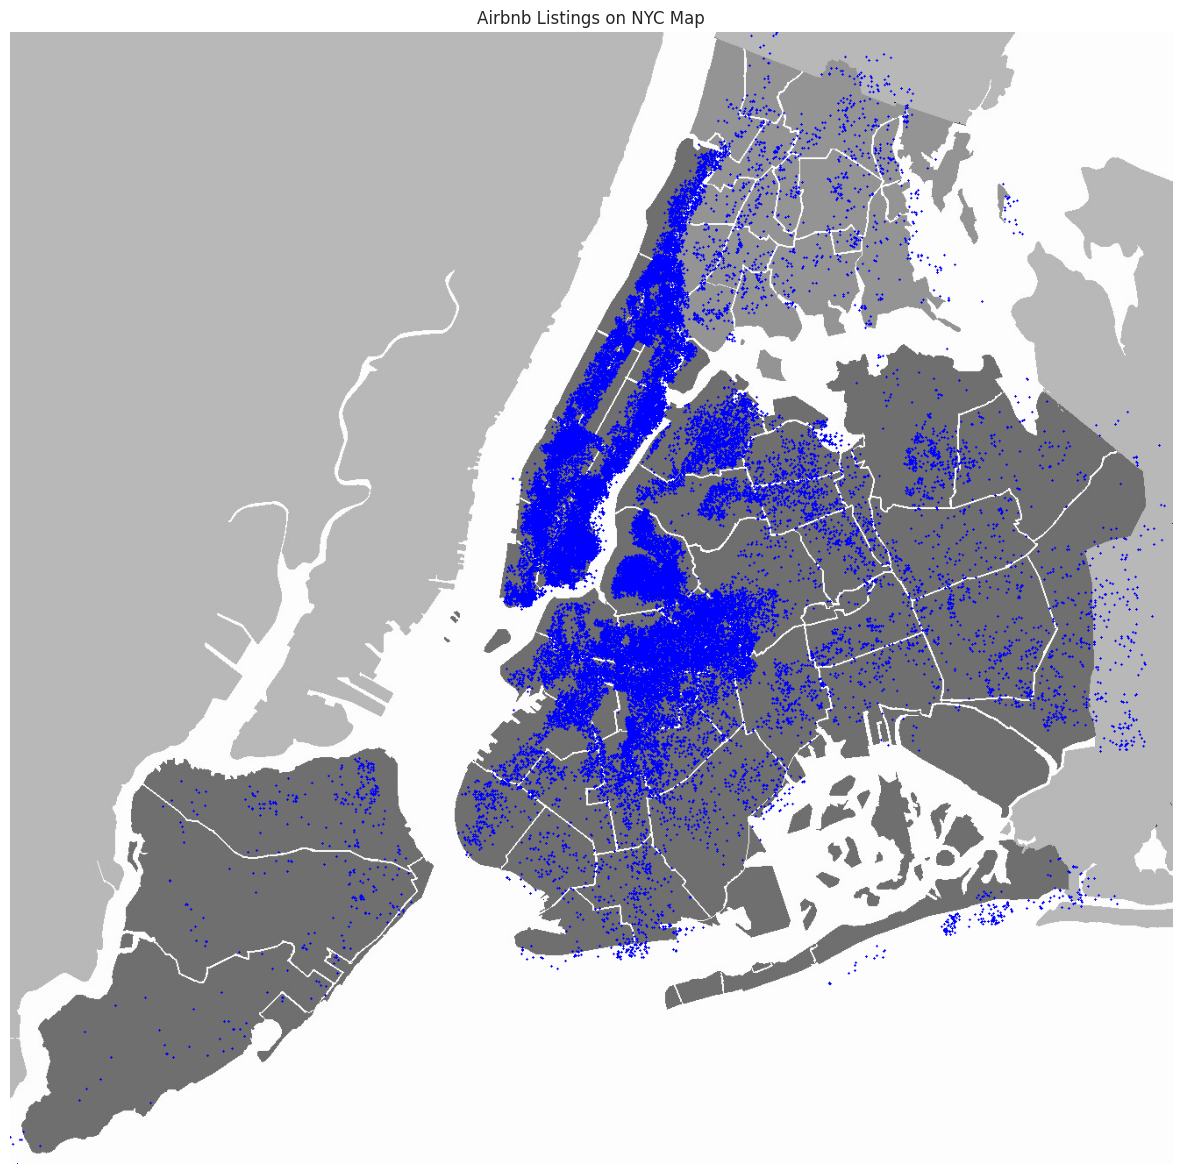

In [21]:
# Create a copy of the image to draw on
nyc_img_with_listings = nyc_img.copy()

# Draw a dot for each listing on the image
for index, row in df.iterrows():
    # Get latitude and longitude
    lat = row['latitude']
    long = row['longitude']

    # Map to pixel coordinates
    pixel_x, pixel_y = map_coordinates_to_pixels(lat, long, min_lat, max_lat, min_long, max_long, img_height, img_width)

    # Draw a small circle at the pixel coordinates
    cv2.circle(nyc_img_with_listings, (pixel_x, pixel_y), 1, (255, 0, 0), -1) # blue dots in BGR

# Display the image with listings
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(nyc_img_with_listings, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('Airbnb Listings on NYC Map')
plt.axis('off') # Hide axes
plt.show()

**Obs:** We see the AirBnb listings on the NYC map, but the dots are a bit off-center, so we need to manually fix their coordinates to fit correctly on the map.
- The dots are off-map to the left and right and also up and down -> make the image height and width smaller
- After resizing the map -> make sure the coordinates of the pixels match the new map size

In [27]:
# Manual adjustmend of image height and weight
img_height = img_height - 40
img_width = img_width - 90

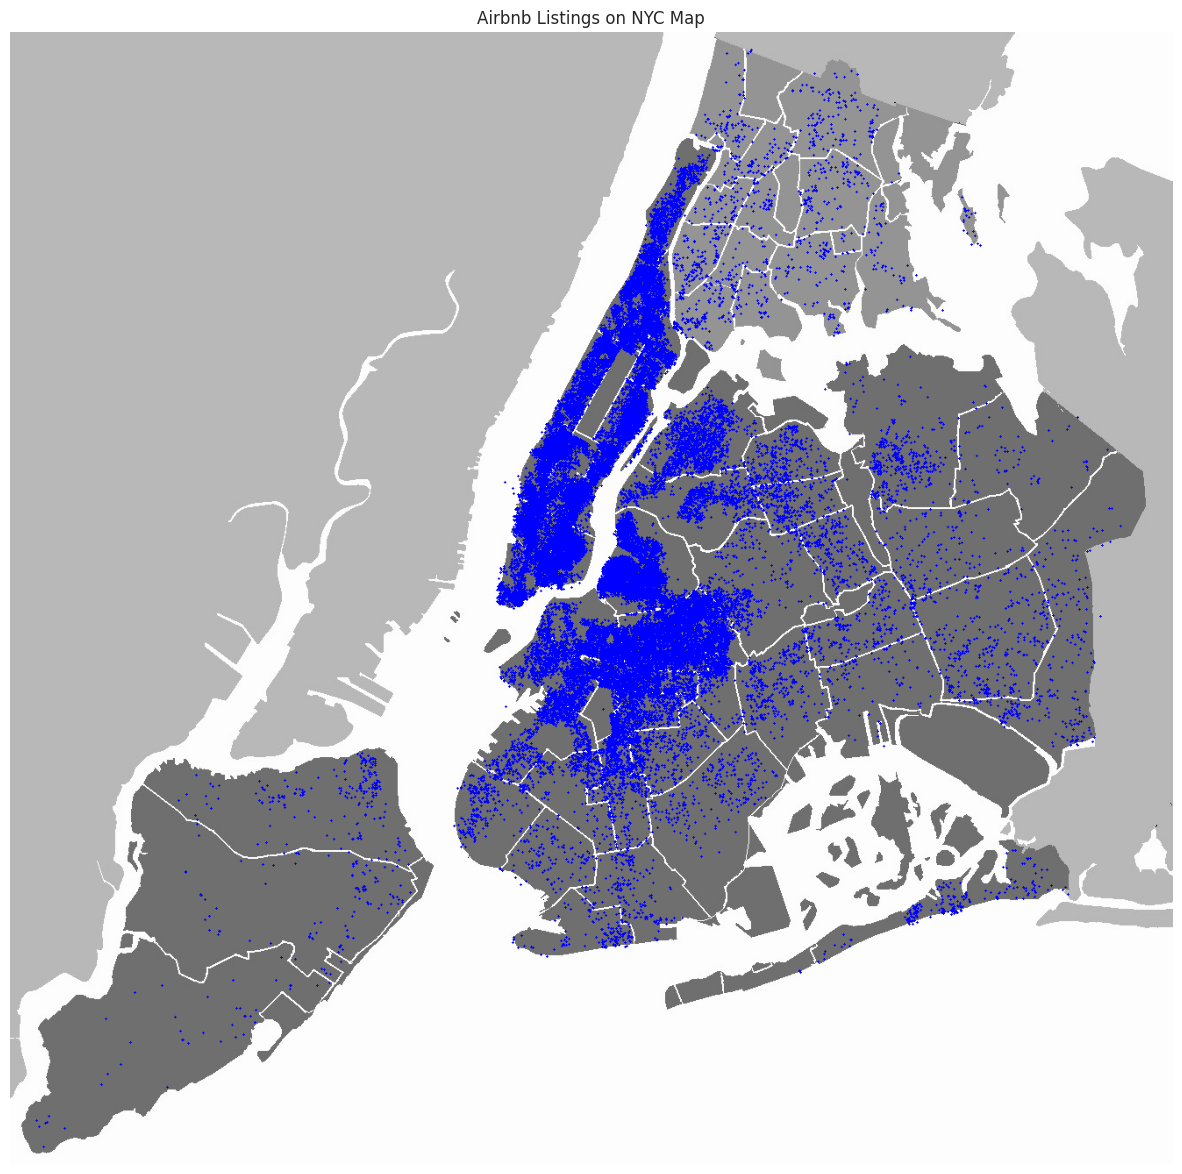

In [28]:
# Create a copy of the image to draw on
nyc_img_with_listings = nyc_img.copy()

# Draw a dot for each listing on the image
for index, row in df.iterrows():
    # Get latitude and longitude
    lat = row['latitude']
    long = row['longitude']

    # Map to pixel coordinates
    pixel_x, pixel_y = map_coordinates_to_pixels(lat, long, min_lat, max_lat, min_long, max_long, img_height, img_width)

    # Manual adjustment of pixel coordinates
    pixel_x = pixel_x + 30
    pixel_y = pixel_y + 20

    # Draw a small circle at the pixel coordinates
    cv2.circle(nyc_img_with_listings, (pixel_x, pixel_y), 1, (255, 0, 0), -1) # blue dots in BGR

# Display the image with listings
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(nyc_img_with_listings, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('Airbnb Listings on NYC Map')
plt.axis('off') # Hide axes
plt.show()

**Obs:** Now we can see on the map all AirBnb listins in NYC displayed correctly.

## Check what columns have null values

In [3]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Obs:** We see that there are few columns that have some NaN values, but there are a lot of listings without reviews

## Check the distribution of room types

- Get the count for each room type

In [4]:
df["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

- Plot the distribution of room types

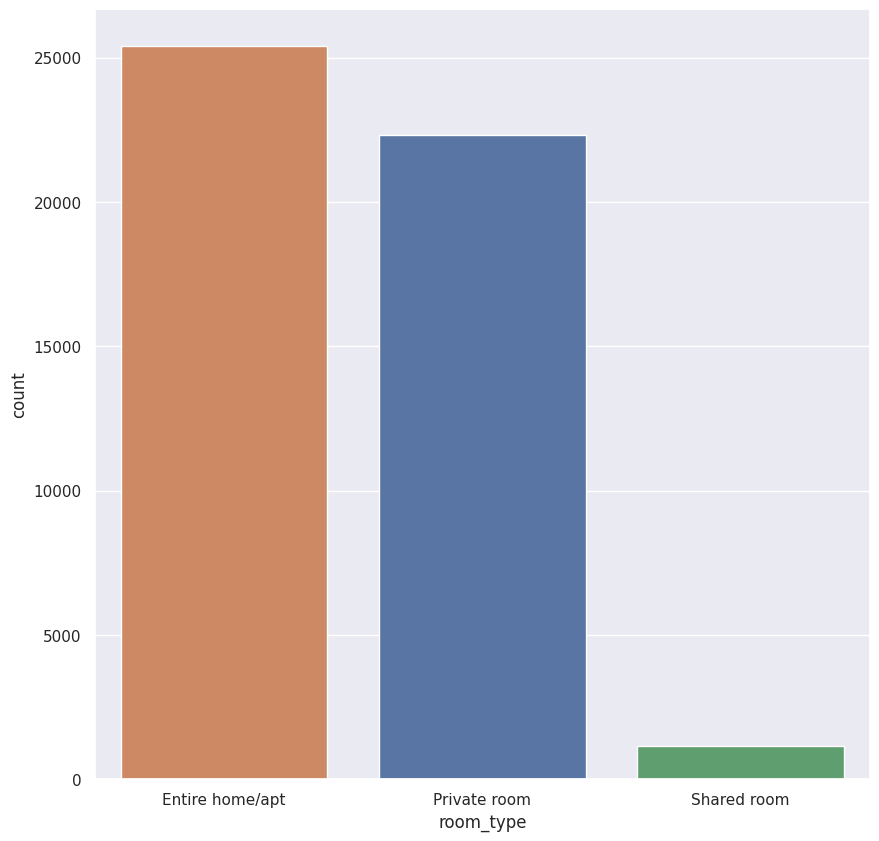

In [5]:
plt.figure(figsize=(10,10))
palette = sns.husl_palette(24, h=240)
sns.countplot(x="room_type", data=df, order=df["room_type"].value_counts().index, palette="deep", hue="room_type", legend=False)
plt.show()

**Obs:** We see that there are almost the same numbers of airbnbs with and entire home and with a private room and a small number with a shared room


## Analysis on neighborhood groups and neighborhoods

- Get the count of each neighbourhood group


In [6]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

- Plot the neighbourhood groups with the number of airbnbs


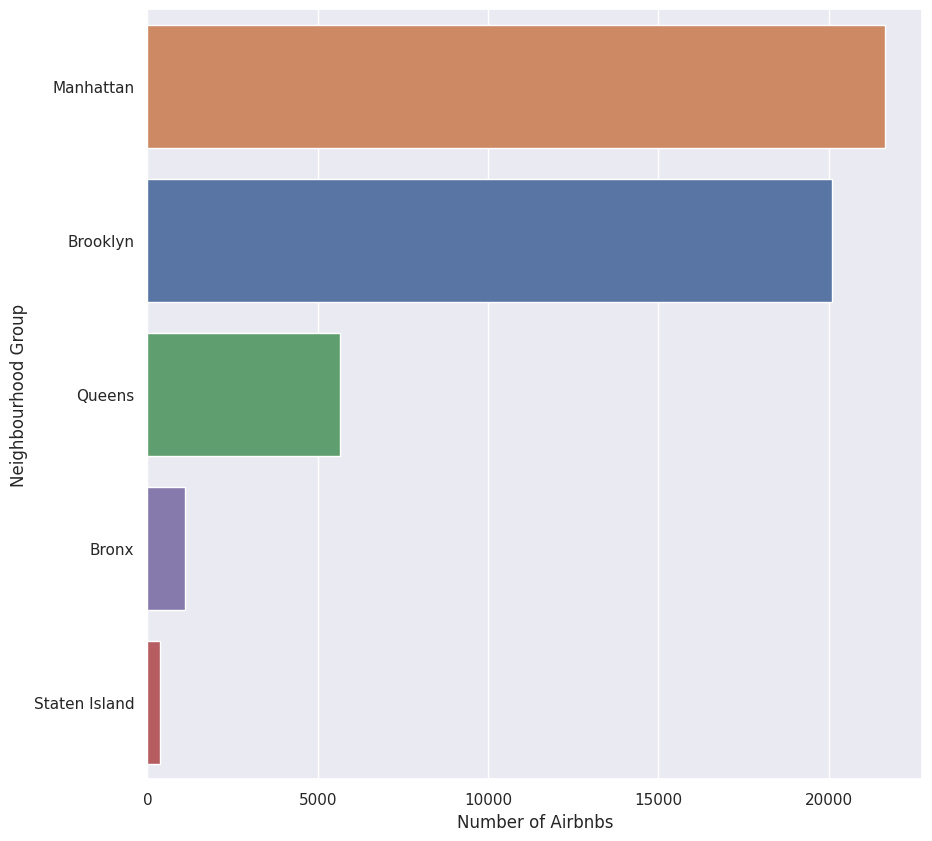

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(y="neighbourhood_group", data=df, order=df["neighbourhood_group"].value_counts().index, palette="deep", hue="neighbourhood_group", legend=False)
plt.xlabel("Number of Airbnbs")
plt.ylabel("Neighbourhood Group")
plt.show()

**Obs:** We see that in Manhattan and then in Brooklyn are the most AirBnb listings

- See the NYC listings displayed by neighborhood group

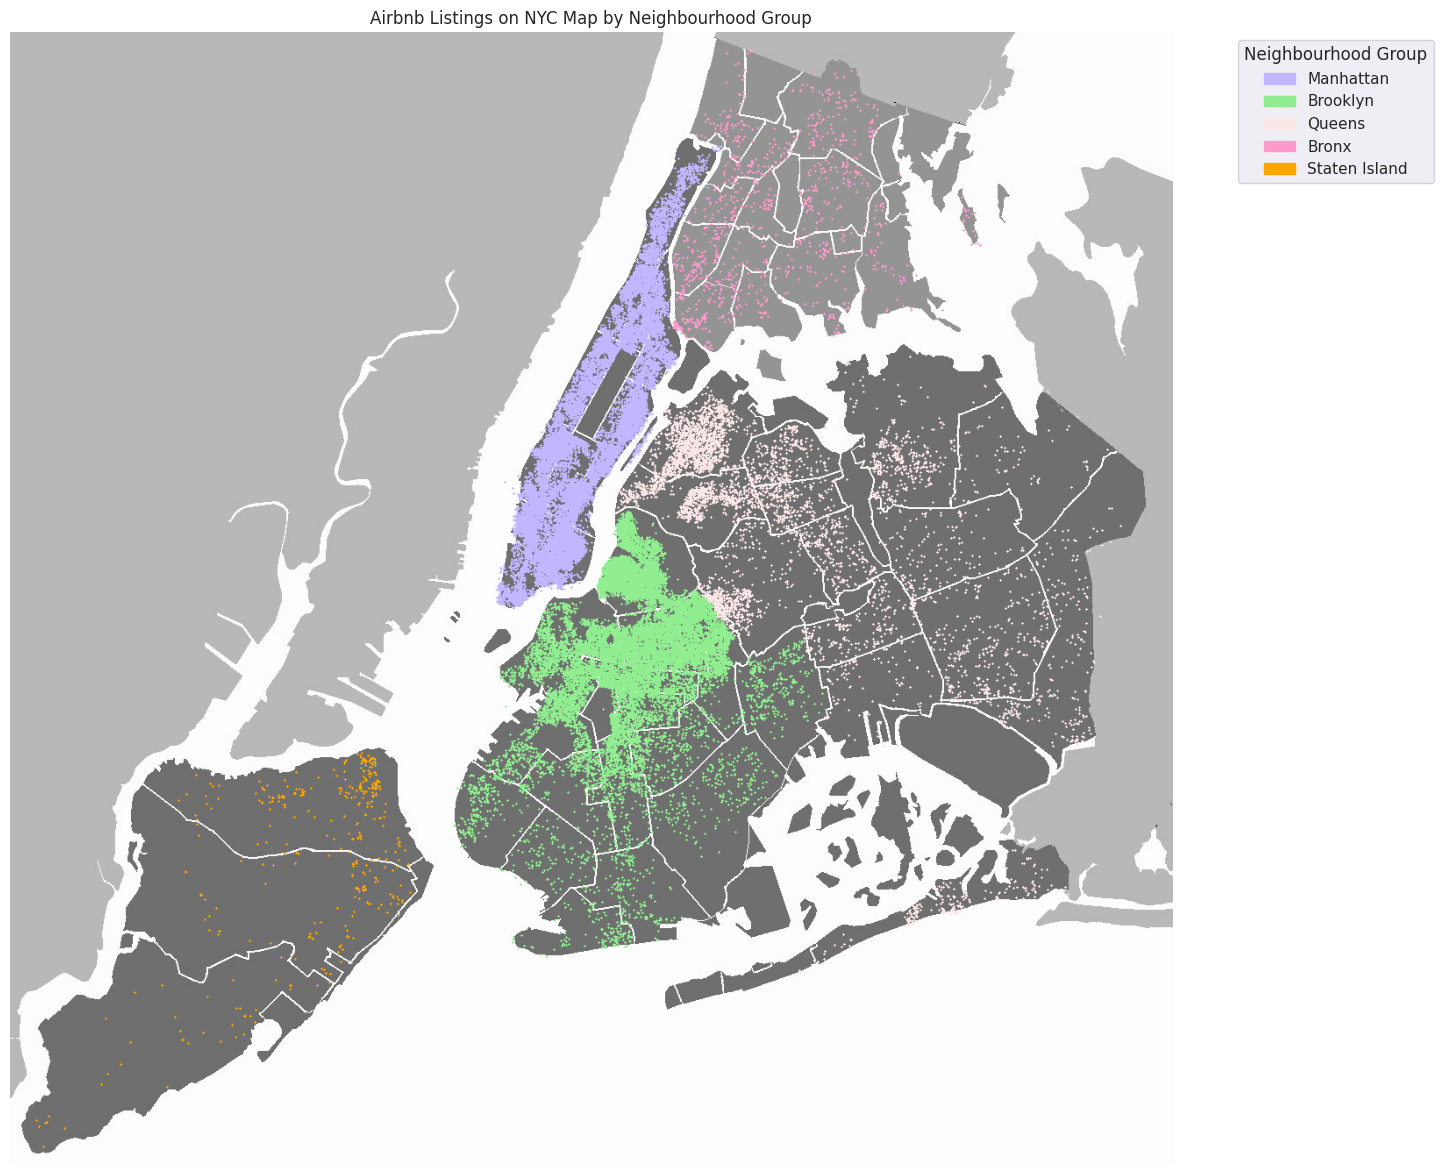

In [29]:
# Create a copy of the image to draw on
nyc_img_with_listings = nyc_img.copy()

# Define a color for each neighbourhood group
group_colors = {
    'Manhattan': (255, 182, 193),  # Light Pink
    'Brooklyn': (144, 238, 144),   # Light Green
    'Queens': (230, 230, 250),     # Light Blue
    'Bronx': (204, 153, 255),     # Light Purple
    'Staten Island': (0, 165, 255) # Light Orange
}

# Draw a dot for each listing on the image, colored by neighbourhood group
for index, row in df.iterrows():
    # Get latitude, longitude, and neighbourhood group
    lat = row['latitude']
    long = row['longitude']
    neighbourhood_group = row['neighbourhood_group']

    # Map to pixel coordinates
    pixel_x, pixel_y = map_coordinates_to_pixels(lat, long, min_lat, max_lat, min_long, max_long, img_height, img_width)

    # Manual adjustment of pixel coordinates
    pixel_x = pixel_x + 30
    pixel_y = pixel_y + 20

    # Get the color for the current neighbourhood group
    color = group_colors.get(neighbourhood_group, (0, 0, 0))

    # Draw a small circle at the pixel coordinates
    cv2.circle(nyc_img_with_listings, (pixel_x, pixel_y), 1, color, -1) # colored dots in BGR

# Display the image with listings colored by neighbourhood group
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(nyc_img_with_listings, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('Airbnb Listings on NYC Map by Neighbourhood Group')
plt.axis('off') # Hide axes

# Create a legend
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=np.array(color[::-1])/255.0, label=group) for group, color in group_colors.items()]
plt.legend(handles=legend_patches, title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Obs:** We can see the neighborhood groups displayed on the map. Now we can analyze the neighborhoods.

- Get the count for each neighbourhood


In [8]:
df["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

**Obs:** We see that there are a lot of neighborhoods so we decide to visualize only the first 10

- Plot the top 10 neighbourhoods with the most airbnbs, coloured by neighborhood group

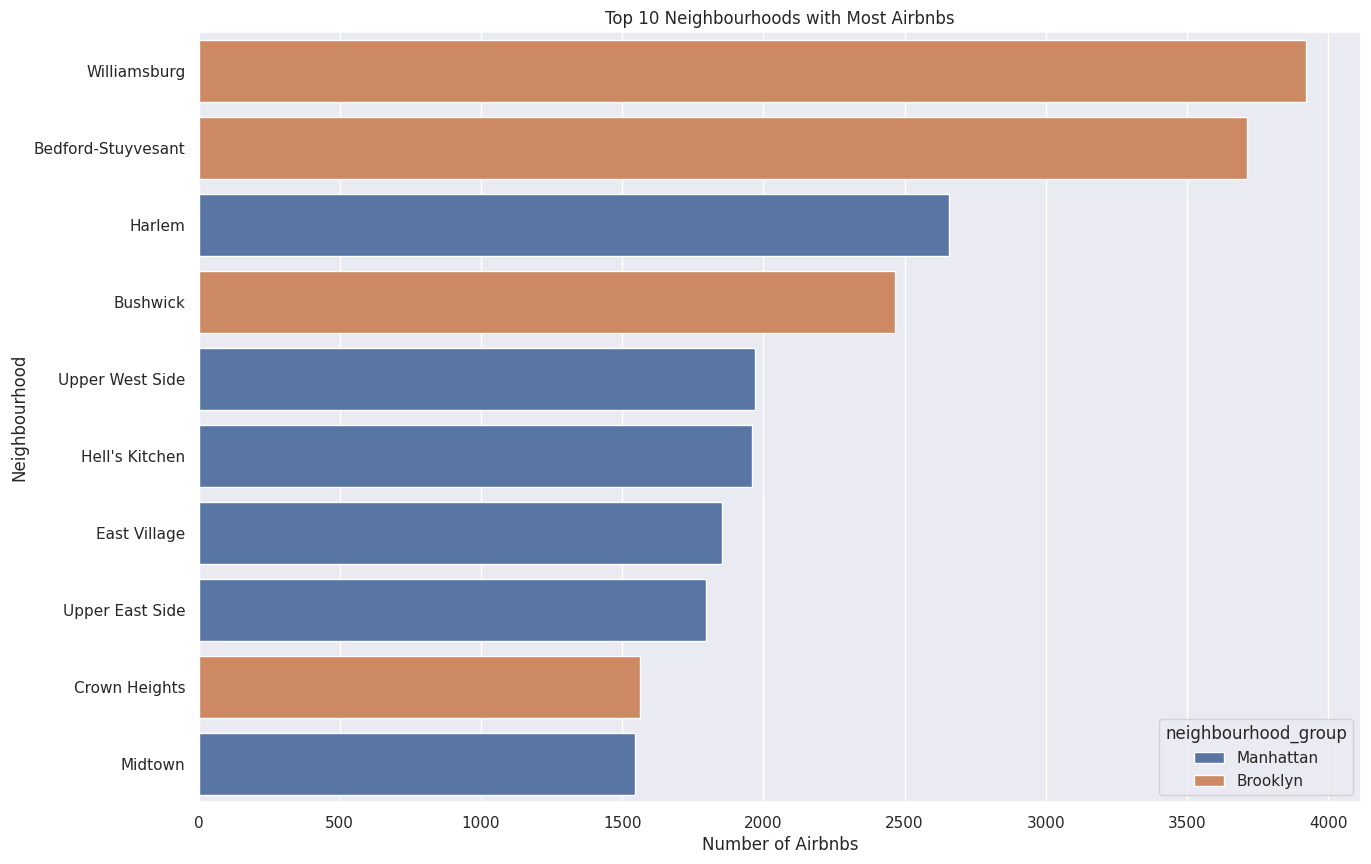

In [9]:
# Get the top 10 neighbourhoods
top10_neigh = df["neighbourhood"].value_counts().head(10).index

# Filter the df to only include the top 10 neighbourhoods
df_top10 = df[df["neighbourhood"].isin(top10_neigh)]

plt.figure(figsize=(15,10))
sns.countplot(y="neighbourhood", data=df_top10, order=top10_neigh, palette="deep", hue="neighbourhood_group") # Changed hue to neighbourhood_group and removed legend=False
plt.title("Top 10 Neighbourhoods with Most Airbnbs")
plt.xlabel("Number of Airbnbs")
plt.ylabel("Neighbourhood")
plt.show()

**Obs:** We can see which neighborhood has the most number of AirBnbs, coloured by the neighborhood group they belong to. We observe that the neighborhoods with the most number of listings belong only to the first 2 neighborhood groups, which is not unexpected.

- Distribution of room types in popular neighborhoods

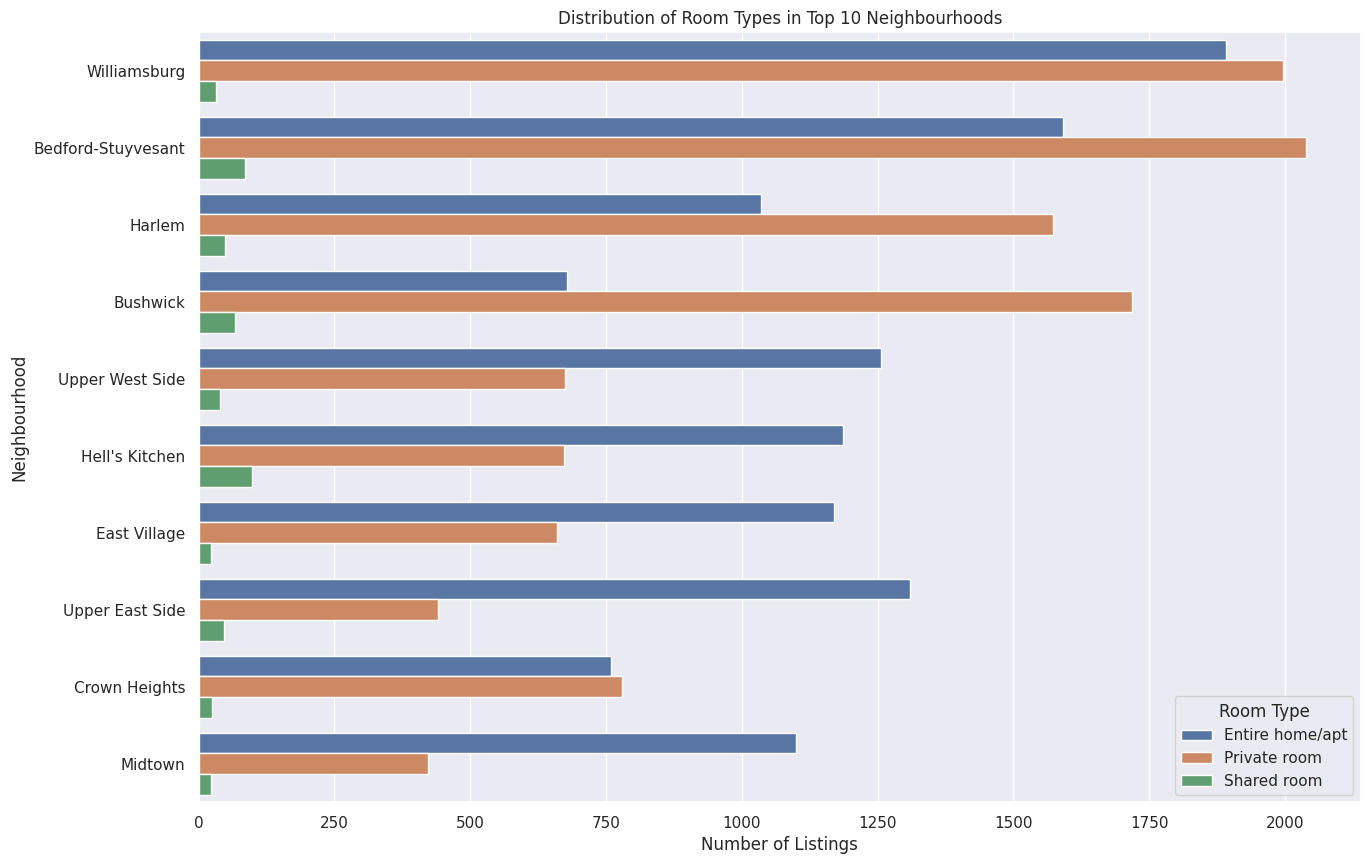

In [10]:
# Get the top 10 neighborhoods from the previous analysis
top10_neigh = df["neighbourhood"].value_counts().head(10).index

# Filter the dataframe to include only the top 10 neighborhoods
df_top10_neigh = df[df["neighbourhood"].isin(top10_neigh)]

# Plot the distribution of room types within the top 10 neighborhoods
plt.figure(figsize=(15, 10))
sns.countplot(data=df_top10_neigh, y="neighbourhood", hue="room_type", order=top10_neigh, palette="deep")
plt.title("Distribution of Room Types in Top 10 Neighbourhoods")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.legend(title="Room Type")
plt.show()

**Obs:** We see that in the first 4 most popular neighborhoods, a private room is highly preferred, but in the others an entire home/apartment is more popular.

## Analysis of average prices in neighborhoods and neighborhood groups

- Get the top 10 neighbourhoods based on the average price of listings per neighborhood

In [11]:
# Filter the dataframe to only include listings in the top 10 neighbourhoods
df_top10_prices = df[df['neighbourhood'].isin(top10_neigh)]

# Calculate the average price for each of the top 10 neighbourhoods
average_price_top10_neigh = df_top10_prices.groupby('neighbourhood')['price'].mean().reset_index()

# Sort the prices descending
average_price_top10_neigh = average_price_top10_neigh.sort_values(by='price', ascending=False)

# Round the price to 2 decimals
average_price_top10_neigh['price'] = average_price_top10_neigh['price'].round(2)

average_price_top10_neigh

neighbourhood   price
6             Midtown  282.72
8     Upper West Side  210.92
5      Hell's Kitchen  204.79
7     Upper East Side  188.95
3        East Village  186.08
9        Williamsburg  143.80
4              Harlem  118.97
2       Crown Heights  112.48
0  Bedford-Stuyvesant  107.68
1            Bushwick   84.80

**Obs:** We can see that some neighbourhoods have very high prices. This would mean that they either have a lot of properties with high prices or only some high values outliers. By using the mean average we can't catch the outliers so we will try to compare the mean with the median.

- Compare the mean and the median prices in the top 10 neighbourhoods


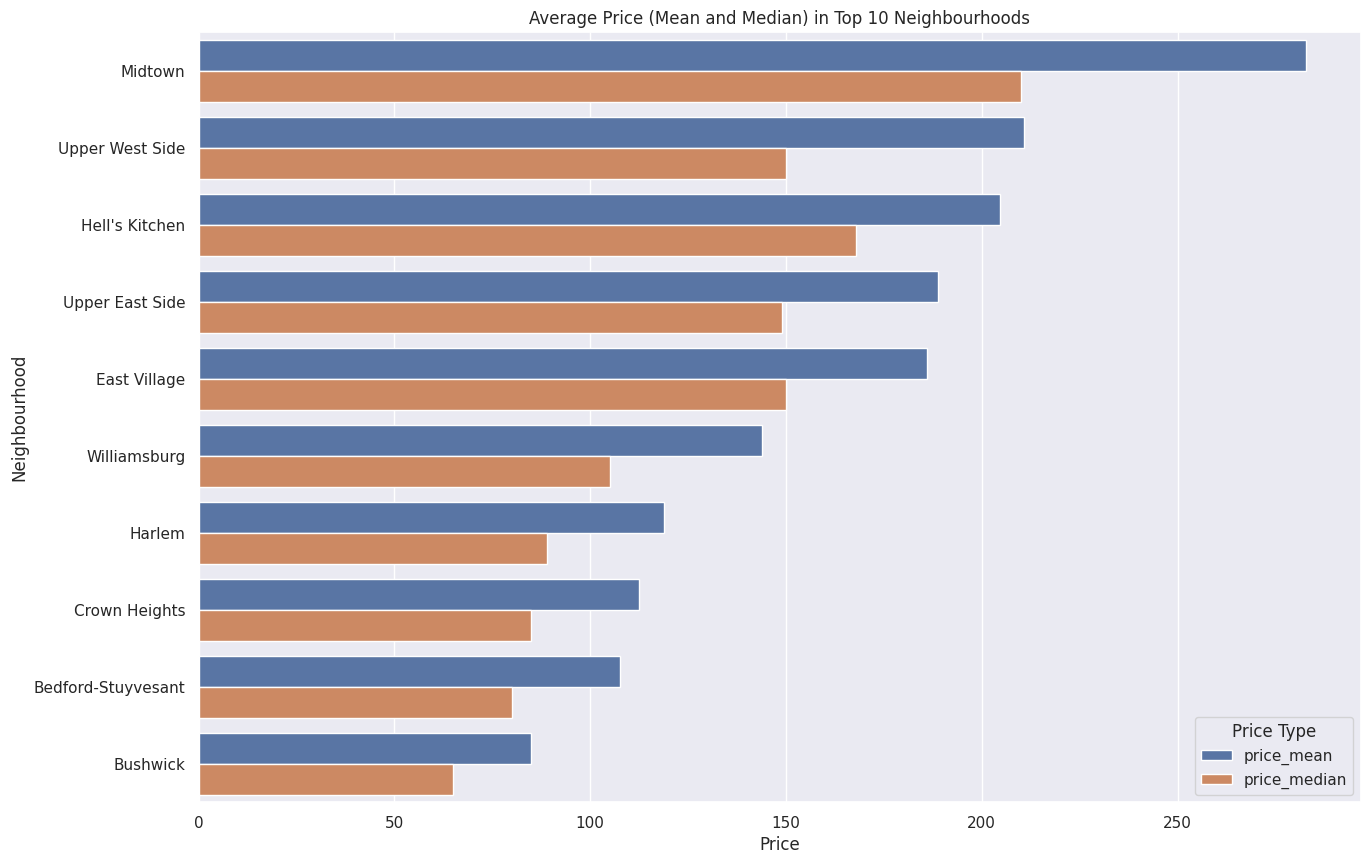

In [12]:
# Calculate the median price for each of the top 10 neighbourhoods
median_price_top10_neigh = df_top10_prices.groupby('neighbourhood')['price'].median().reset_index()

# Merge the mean and median price dataframes
average_prices_top10 = pd.merge(average_price_top10_neigh, median_price_top10_neigh, on='neighbourhood', suffixes=('_mean', '_median'))

# Sort the prices descending
average_price_top10_neigh = average_price_top10_neigh.sort_values(by='price', ascending=False)

# Use melt so we can print both the mean and median average prices under the same Price column
average_prices_top10_melted = average_prices_top10.melt(id_vars='neighbourhood', var_name='Price Type', value_name='Price')

# Plot the mean and median prices
plt.figure(figsize=(15, 10))
sns.barplot(data=average_prices_top10_melted, x='Price', y='neighbourhood', hue='Price Type', palette='deep')
plt.title('Average Price (Mean and Median) in Top 10 Neighbourhoods')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.legend(title='Price Type')
plt.show()

**Obs:** We can see that there is a consistent difference in price between the mean and median average, but especially in the first two neighbourhoods. This means that in the neighbourhoods which are more popular and more properties are listed, there are some properties with a very high price.

## Reviews analysis

- Plot the average number of reviews per Neighborhood Group

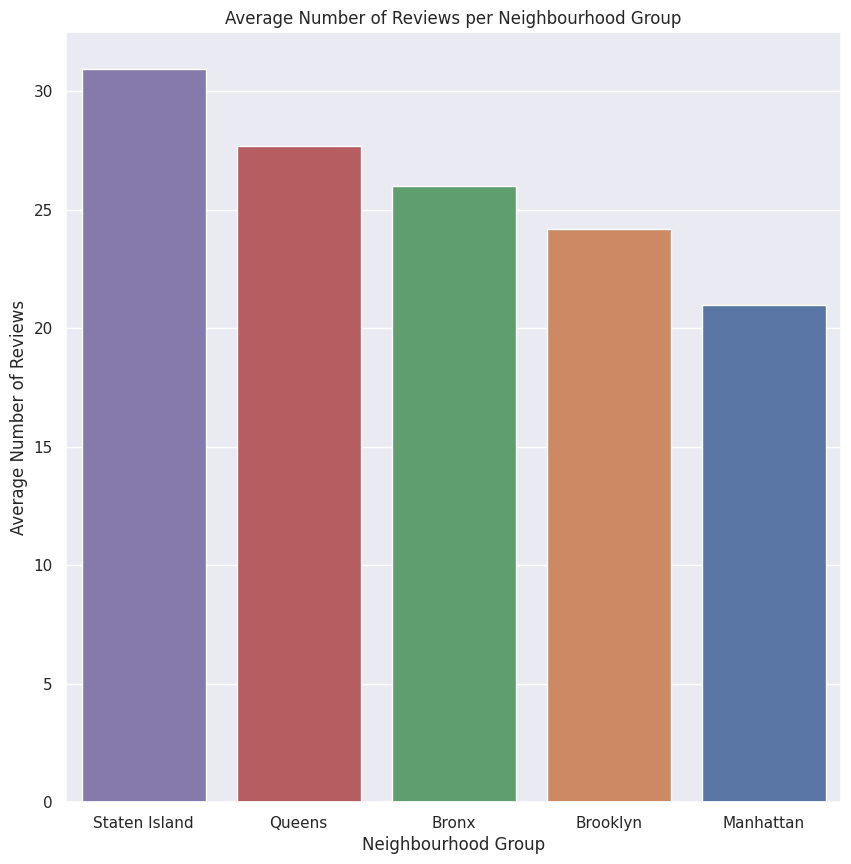

In [13]:
# Calculate the average number of reviews per neighbourhood group
average_reviews_by_group = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()

# Sort the reviews descending
average_reviews_by_group = average_reviews_by_group.sort_values(by='number_of_reviews', ascending=False)

# Plot
plt.figure(figsize=(10, 10))
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=average_reviews_by_group, hue='number_of_reviews', palette='deep', legend=False)
plt.title('Average Number of Reviews per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Number of Reviews')
plt.show()

**Obs:** We can see the average number of reviews does not vary too much, in each neighborhood the average is between 20 and 30. This does not tell us very much because we do not know the relationship between the number of reviews and the number of listings for each neighborhood.

- Calculate the average number of reviews per neighbourhood group


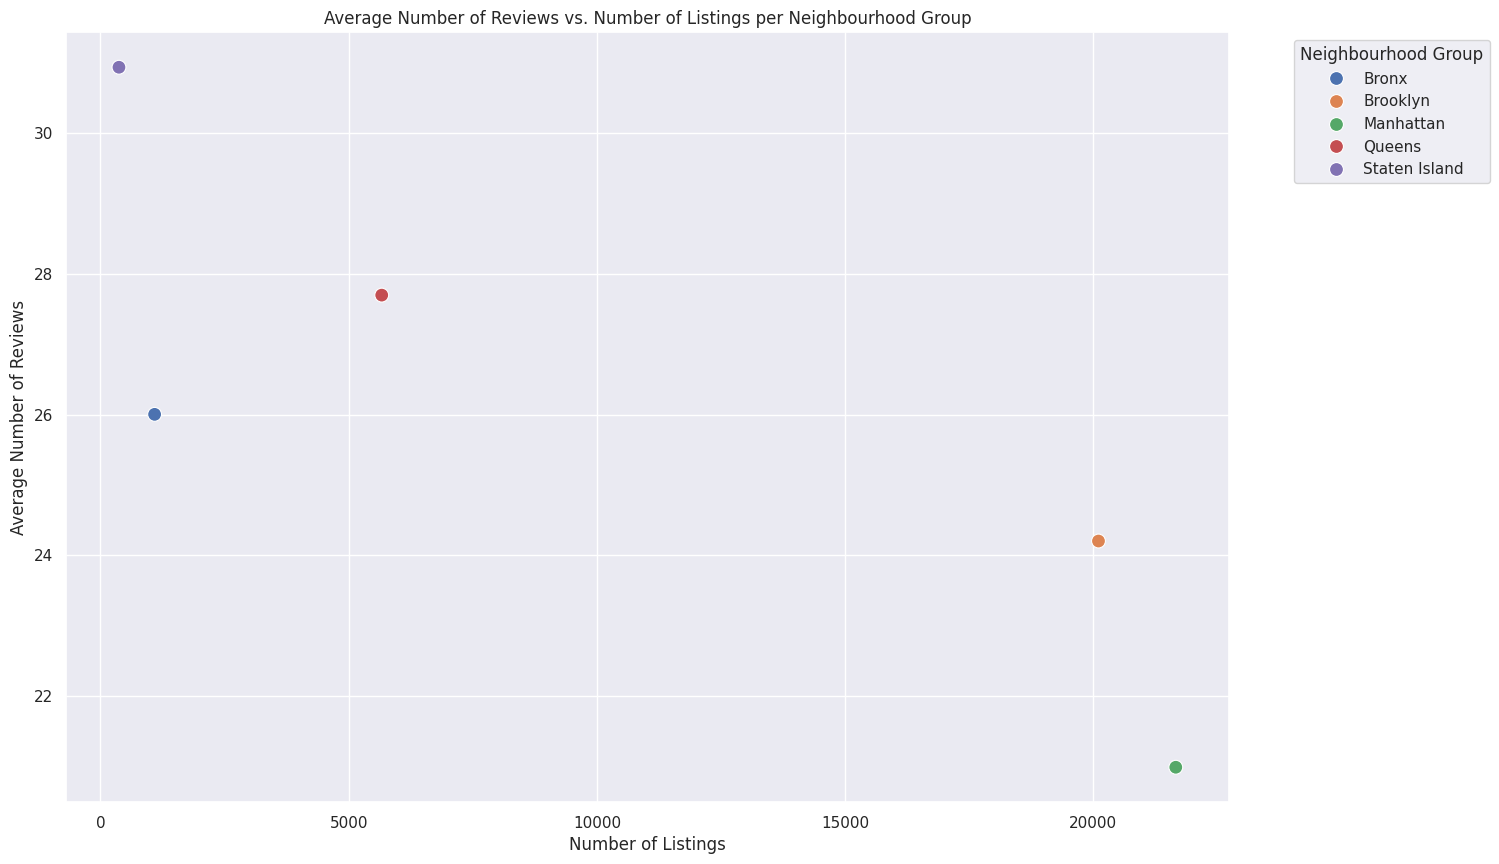

In [14]:
average_reviews_by_group = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index(name='average_reviews')

# Calculate the number of listings per neighbourhood group
listing_counts_by_group = df['neighbourhood_group'].value_counts().reset_index(name='listing_count')
listing_counts_by_group.rename(columns={'index': 'neighbourhood_group'}, inplace=True)

# Merge the two dataframes
group_metrics = pd.merge(average_reviews_by_group, listing_counts_by_group, on='neighbourhood_group')

# Create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=group_metrics, x='listing_count', y='average_reviews', hue='neighbourhood_group', s=100)
plt.title('Average Number of Reviews vs. Number of Listings per Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Average Number of Reviews')
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Obs:** We can see that there isn't a good correlation between the number of listings and the average number of reviews across the neighbourhood groups. For example, Staten Island, with the fewest listings, has the highest average number of reviews, while Manhattan and Brooklyn, with the most listings, have the lowest average number of reviews. This suggests that if there are more listings in a neighborhood, it does not mean that there are more reviews for those listings, but on the contrary, which is a bit unexpected.

- See the correlation coefficients between price and number of reviews

In [30]:
# Calculate correlation coefficients
pearson_corr = df['price'].corr(df['number_of_reviews'], method='pearson')
spearman_corr = df['price'].corr(df['number_of_reviews'], method='spearman')
kendall_corr = df['price'].corr(df['number_of_reviews'], method='kendall')

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"Kendall correlation coefficient: {kendall_corr:.4f}")

Pearson correlation coefficient: -0.0480
Spearman correlation coefficient: -0.0550
Kendall correlation coefficient: -0.0379


**Obs:** The three correlation coefficients are very close to eachother and more importantly, very close to 0. This means that there is very little relation between the price of a listing and the number of reviews it receives.
- Pearson correlation (-0.0480): The value is close to 0 and it indicates a very weak linear relationship. The negative value suggests a slight tendency for price to decrease as the number of reviews increases.
- Spearman correlation (-0.0550): The value also close to 0 indicates a very weak monotonic relationship.
- Kendall correlation (-0.0379): The the value is very close to 0, suggesting a very weak relationship.

- Plot the relation between the prices and the number of reviews of listings

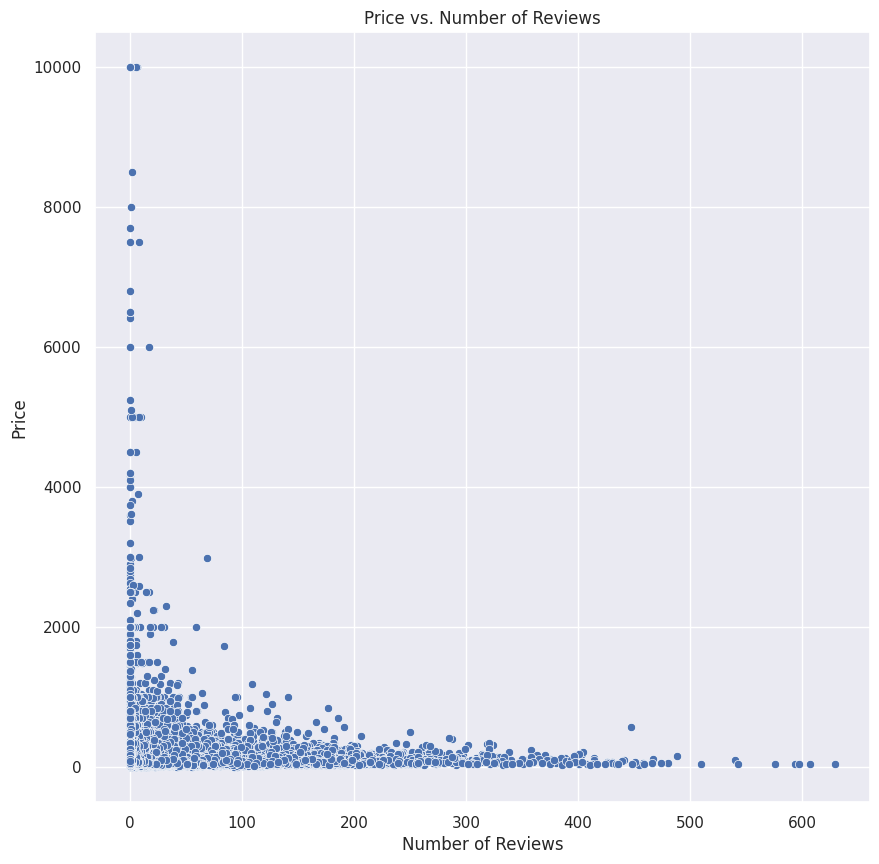

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

**Obs:**
- We can see that the listings with a very high number of reviews tend to have lower prices, so the more affordable listings receive more bookings and more reviews
- There are a lot of listings with high prices and few reviews, so probably not many people book them
- The majority of listings are cheaper and have a small number of reviews

- Plot the relation between the number of reviews and availability


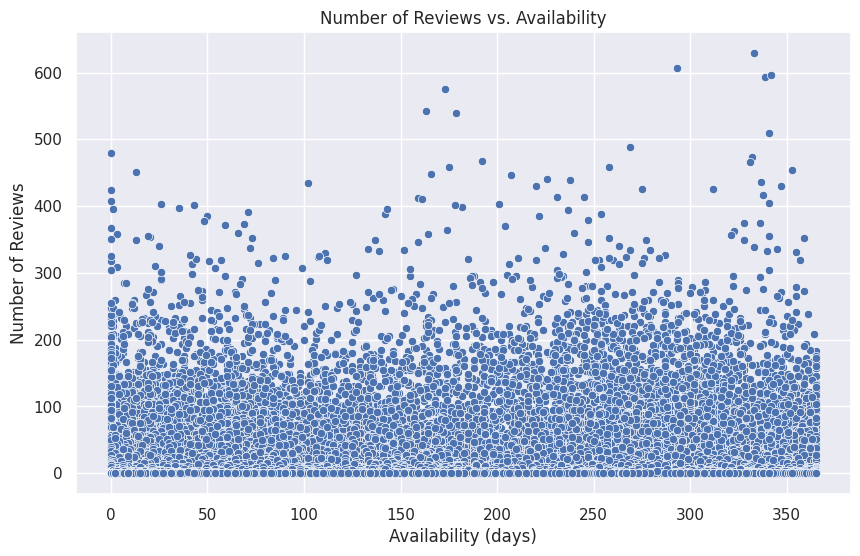

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews', data=df)
plt.title('Number of Reviews vs. Availability')
plt.xlabel('Availability (days)')
plt.ylabel('Number of Reviews')
plt.show()

**Obs:** We are trying to see if there is a correlation between the availability and the number of reviews, but the graph shows us that there is no strong correlation, because the points are scattered across the plot.
- Listings with high availability that have both low and high numbers of reviews
- Listings with low availability also have a wide range in the number of reviews
- This suggests that a listing's availability throughout the year doesn't seem to be a deciding factor determining how many reviews it gets
- Other factors like price, location, room type, or the quality of the listing and host could influence the number of bookings and reviews.

## Pinpoint on the map the best listings based on price and reviews

- Get the properties that have the best price, meaning the properties that cost less than the average price

In [36]:
median_price = df['price'].median()

# Filter for listings that meet the price criteria
best_listings_price = df[df['price'] < median_price].copy()

# Check how many listings meet the criteria
print(f"Number of listings considered 'best': {len(best_listings_price)}")

Number of listings considered 'best': 24437


- Get the properties that have more that the average number of reviews

In [39]:
average_reviews = df['number_of_reviews'].mean()

# Filter for listings that meet the reviews criteria
best_listings_reviews = df[df['number_of_reviews'] > average_reviews].copy()

# Check how many listings meet the criteria
print(f"Number of listings considered 'best': {len(best_listings_reviews)}")

Number of listings considered 'best': 12235


- Get the properties that meet both criteria for price and reviews

In [40]:
# Filter for listings that meet the criteria
best_listings = df[(df['number_of_reviews'] > average_reviews) & (df['price'] < median_price)].copy()

# Check how many listings meet the criteria
print(f"Number of listings considered 'best': {len(best_listings)}")

Number of listings considered 'best': 6458


- Get the number of total listings so we can clearly see how many listings are 'best'

In [42]:
all_listings = df.copy()
print(f"Number of total listings: {len(all_listings)}")

Number of total listings: 48895


**Obs:** On the map we should see that there are 8 times more listings than the number of 'best' listings we determined

- Show on the map all the listings (blue) and highlight the best listings (green)

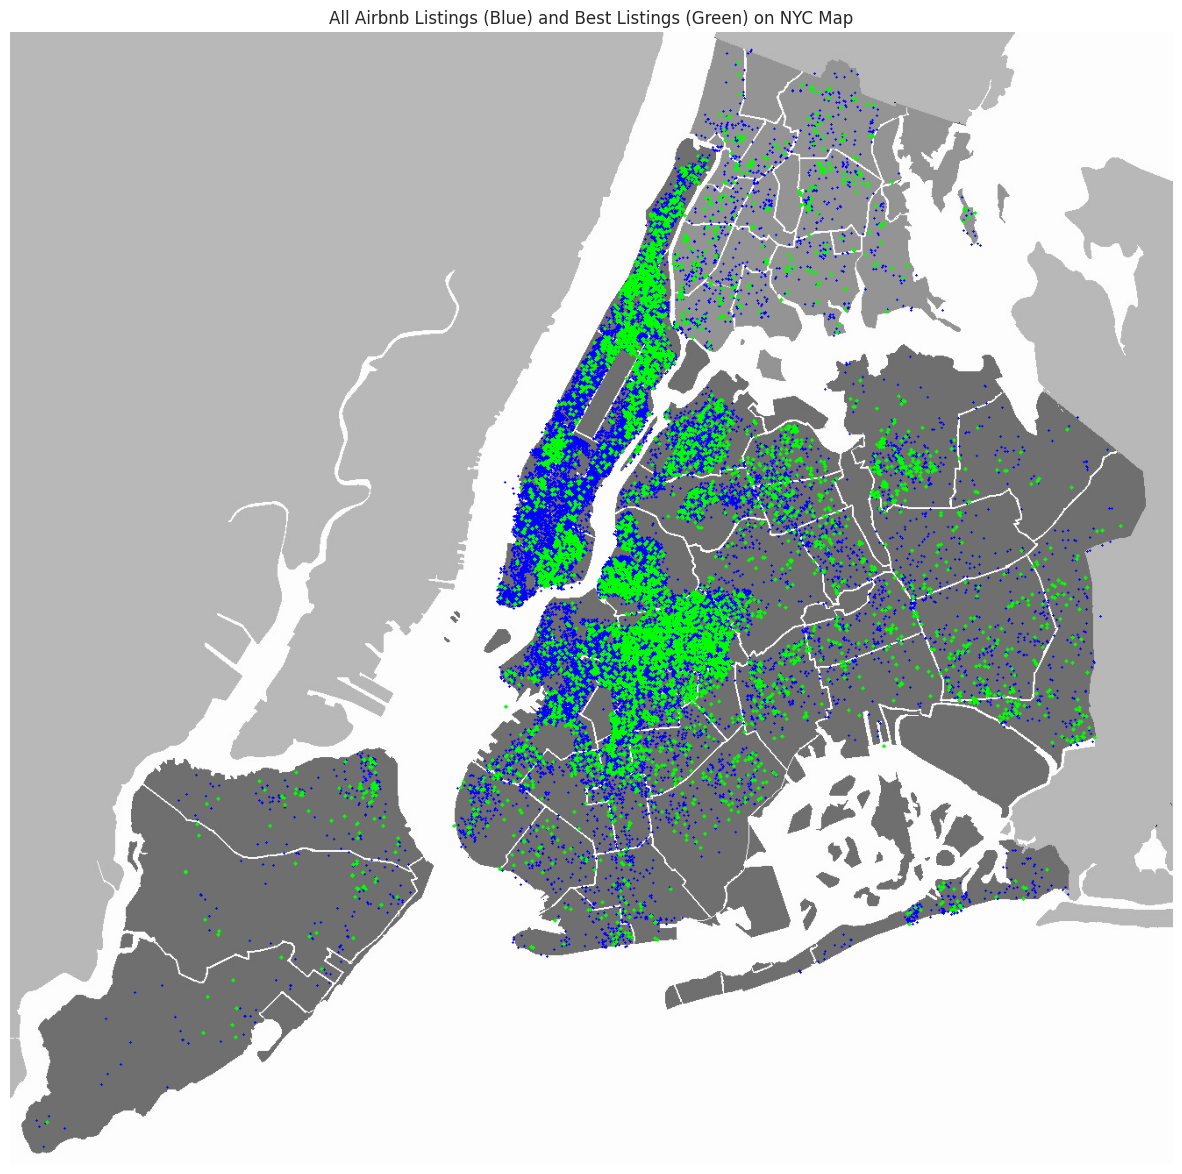

In [43]:
# Create a copy of the original image to draw on
nyc_img_all_and_best = nyc_img.copy()

# Draw all listings in blue
for index, row in all_listings.iterrows():
    # Get latitude and longitude
    lat = row['latitude']
    long = row['longitude']

    # Map to pixel coordinates using the previously defined function
    pixel_x, pixel_y = map_coordinates_to_pixels(lat, long, min_lat, max_lat, min_long, max_long, img_height, img_width)

    # Manual adjustment of pixel coordinates
    pixel_x = pixel_x + 30
    pixel_y = pixel_y + 20

    # Draw a small circle at the pixel coordinates (blue color)
    cv2.circle(nyc_img_all_and_best, (pixel_x, pixel_y), 1, (255, 0, 0), -1) # Blue color in BGR

# Draw the "best" listings in green on top of the blue dots
for index, row in best_listings.iterrows():
    # Get latitude and longitude
    lat = row['latitude']
    long = row['longitude']

    # Map to pixel coordinates using the previously defined function
    pixel_x, pixel_y = map_coordinates_to_pixels(lat, long, min_lat, max_lat, min_long, max_long, img_height, img_width)

    # Manual adjustment of pixel coordinates
    pixel_x = pixel_x + 30
    pixel_y = pixel_y + 20

    # Draw a slightly larger circle for "best" listings (green color)
    cv2.circle(nyc_img_all_and_best, (pixel_x, pixel_y), 2, (0, 255, 0), -1) # Green color in BGR

# Display the image with all listings and the best listings highlighted
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(nyc_img_all_and_best, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.title('All Airbnb Listings (Blue) and Best Listings (Green) on NYC Map')
plt.axis('off') # Hide axes
plt.show()

**Obs:** Now we can clearly see on the map which listings are considered 'best' across all listings.